# Logistic Regression

## 1 Logistic regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

### 1.1 Visualizing the data

In [118]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import fmin_bfgs, minimize
import warnings
warnings.simplefilter('ignore')

df = pd.read_csv('ex2data1.txt', header=None)
df.rename(columns={0: 'exam1', 
                   1: 'exam2',
                   2: 'accepted'}, inplace=True)
df.head()

,exam1,exam2,accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


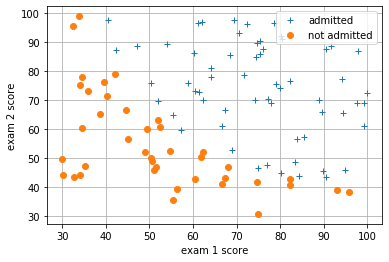

In [2]:
accepted_students = df[df.accepted==1]
others = df[df.accepted==0]
plt.plot(accepted_students.exam1, accepted_students.exam2, 
         marker='+', linestyle='None', label='admitted')
plt.plot(others.exam1, others.exam2,
        marker='o', linestyle='None', label='not admitted')
plt.xlabel('exam 1 score')
plt.ylabel('exam 2 score')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### 1.2  Implementation

In [76]:
def normalize(x):
    mu = np.mean(x,axis=0)
    sigma = np.std(x,axis=0)
    x = (x-mu)/sigma
    return mu, sigma, x

def sigmoid(z):
    return 1/(1 + np.exp(-1 * z))

def costFunc(theta, X, y):
    m = len(y)
    p_y = X @ theta.reshape(-1,1)
    J = np.mean((-y * np.log(sigmoid(p_y))) - ((1-y) * np.log(1-sigmoid(p_y))))
    return J

def gradient(theta, X, y):
    m = len(y)    
    theta = theta.reshape(-1,1)
    p_y = X @ theta
    grad = 1/m * X.T @ (sigmoid(p_y) - y)
    return grad.flatten()

In [81]:
X = df[['exam1', 'exam2']].values
mu, sigma, X_norm = normalize(X)
X_bias = np.concatenate((np.ones(shape=(len(df),1)), X), axis=1)
X_norm_bias = np.concatenate((np.ones(shape=(len(df),1)), X_norm), axis=1)
y = df.accepted.values.reshape(-1,1)

In [84]:
n, m = X.shape
initial_theta = np.zeros(m+1)
cost = costFunc(initial_theta, X_bias, y)
grad = gradient(initial_theta, X_bias, y)

In [85]:
print(f'Cost at initial theta (zeros) is {np.squeeze(cost)}')
print(f'Expected cost (approx): 0.693\n')
       
print(f'Gradient at initial theta (zeros) is \n{grad}')
print(f'Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')


Cost at initial theta (zeros) is 0.6931471805599453
Expected cost (approx): 0.693

Gradient at initial theta (zeros) is 
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



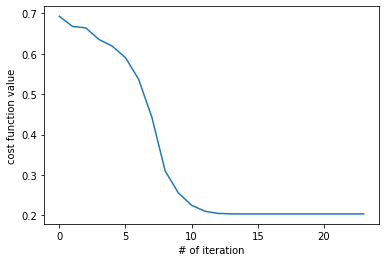

In [119]:
# optimization with no normalization
theta, theta_history = fmin_bfgs(costFunction,
                               initial_theta,
                               fprime = gradient,
                               args=(X_bias,y),
                               retall = 1, 
                               disp = 0)

J = []
for i, th in enumerate(theta_history):
    J.append(costFunction(th, X_bias, y))  
plt.plot(J)
plt.xlabel('# of iteration')
plt.ylabel('cost function value')
plt.show()

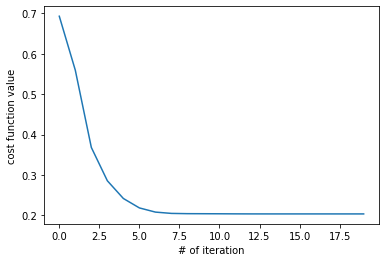

In [121]:
# optimization with normalization of data -> faster convergence
theta, theta_history = fmin_bfgs(costFunction,
                               initial_theta,
                               fprime = gradient,
                               args=(X_norm_bias,y),
                               retall = 1, 
                               disp = 0)

J = []
for i, th in enumerate(theta_history):
    J.append(costFunction(th, X_norm_bias, y))  
plt.plot(J)
plt.xlabel('# of iteration')
plt.ylabel('cost function value')
plt.show()